In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# STREAM: CLEAN DATA
stream = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX/Dataset streaming platforms/Streaming_dataset.csv')
stream.drop(['Time Used (hours)'], axis=1, inplace=True)
stream = stream.groupby('Platform').agg({
    'Subscribers (millions)': 'sum',
    'Annual Revenue (millions)': 'sum',
    'Number of Movies': 'sum',
    'Number of Series': 'sum',
    'Average Rating /5': 'mean'
})
stream['Average Rating /5'] = stream['Average Rating /5'].round(2)
stream[['Subscribers (millions)','Annual Revenue (millions)']] = stream[['Subscribers (millions)','Annual Revenue (millions)']].astype(int)
stream.columns = stream.columns.str.strip()
stream.reset_index(inplace=True)

Text(0, 0.5, '')

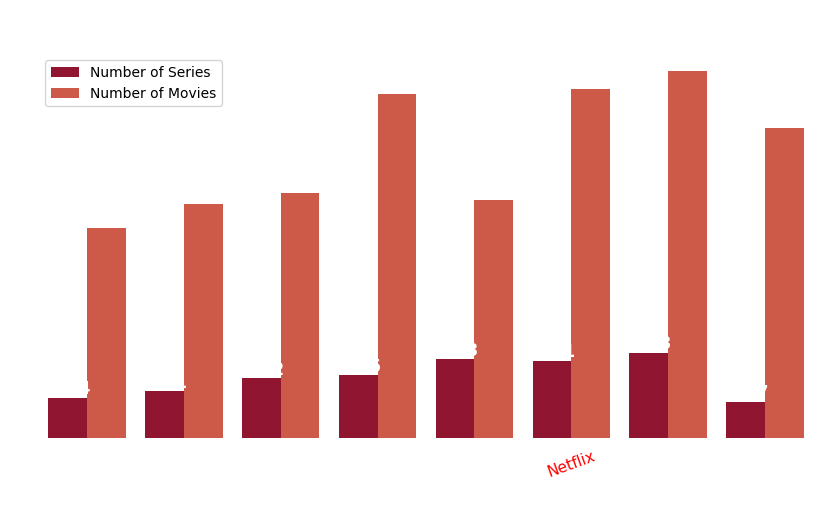

In [ ]:
# STREAM: NUMBER OF MOVIES AND SERIES

stream_ms = pd.melt(
    stream,
    id_vars=['Platform'],
    value_vars=['Number of Movies', 'Number of Series'],
    var_name='Type',
    value_name='Count'
)
stream_ms = stream_ms.sort_values(by=['Platform','Count'])
stream_ms = stream_ms.reset_index()

colors = plt.cm.RdYlBu(np.linspace(0, 1, len('Platform'))) # Tạo gradient màu từ đỏ sang đen
fig = plt.figure(figsize=(10,5))
stream_chart = sns.barplot(stream_ms, x='Platform', y='Count', hue='Type', palette=colors)

for a in stream_chart.patches:
  if a.get_height() > 0:
    stream_chart.annotate(f'{int(a.get_height())}',
                        (a.get_x() + a.get_width() / 2, a.get_height()+10),
                        ha='center', va='bottom', fontsize=12, color='white', fontweight='semibold')
  a.set_zorder(3)

sns.despine()
plt.legend(frameon=True, facecolor='black', edgecolor='none', loc='upper left', bbox_to_anchor=(0,1.05))
for text in plt.legend().get_texts():
    text.set_color('black')
stream_chart.spines['left'].set_visible(False)
stream_chart.spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False, color='darkgray')
plt.xticks(fontsize=11, rotation=20)
plt.yticks([])
plt.gca().set_facecolor('none')
fig.patch.set_alpha(0)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3, zorder=0)

# Tô màu nhãn 'Netflix'
ax = plt.gca()
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == 'Netflix':
        tick_label.set_color('red')
    else:
        tick_label.set_color('white')

plt.title('Platform Movies and Series Quantity', fontsize=16, color='white', fontweight='semibold', loc='left', pad=20)
plt.xlabel('', fontsize=14, labelpad=20, fontweight='semibold')
plt.ylabel('')

Text(0, 0.5, '')

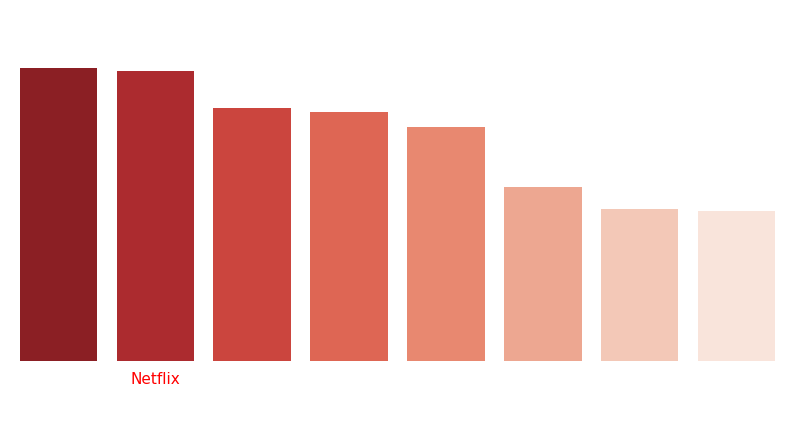

In [ ]:
# STREAM: ANNUAL REVENUE (MILLIONS)
stream_order = stream.sort_values(by=['Annual Revenue (millions)', 'Platform'], ascending=[False,True])
stream_order = stream_order.reset_index()

colors = plt.cm.Reds(np.linspace(0, 1, len('Platform') - 1)) # Tạo gradient màu
colors = np.vstack([colors, [0, 0, 0, 1]])
fig = plt.figure(figsize=(10,4))
stream_chart = sns.barplot(stream_order, x='Platform', y='Annual Revenue (millions)', palette='Reds_r')

for a in stream_chart.patches:
  if a.get_height() > 0:
    stream_chart.annotate(f'{int(a.get_height())}',
                        (a.get_x() + a.get_width() / 2, a.get_height()+10),
                        ha='center', va='bottom', fontsize=12, color='white', fontweight='semibold')
  a.set_zorder(3)

sns.despine()
# plt.legend(frameon=False)
stream_chart.spines['left'].set_visible(False)
stream_chart.spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False, color='darkgray')
plt.xticks(fontsize=11, ticks=range(len(stream_order['Platform'])), labels=[label.replace(' ', '\n') for label in stream_order['Platform']])
plt.yticks([])
plt.gca().set_facecolor('none')
fig.patch.set_alpha(0)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3, zorder=0)

# Tô màu nhãn 'Netflix'
ax = plt.gca()
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == 'Netflix':
        tick_label.set_color('red')
    else:
        tick_label.set_color('white')

plt.title('Platform Annual Revenue (millions)', fontsize=16, color='white', fontweight='semibold', loc='left', pad=20)
plt.xlabel('', fontsize=14, labelpad=20, fontweight='semibold')
plt.ylabel('')

Text(0, 0.5, '')

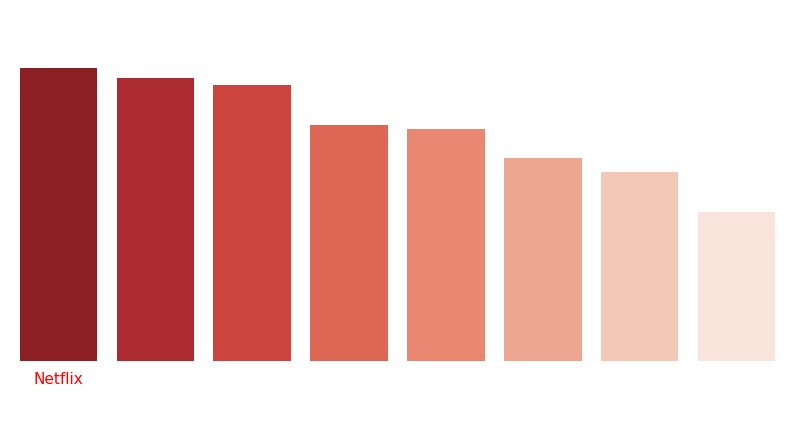

In [ ]:
# STREAM: SUBSCRIBERS
stream_order = stream.sort_values(by=['Subscribers (millions)', 'Platform'], ascending=[False,True])
stream_order = stream_order.reset_index()
fig = plt.figure(figsize=(10,4))
stream_chart = sns.barplot(stream_order, x='Platform', y='Subscribers (millions)', palette='Reds_r')

for a in stream_chart.patches:
  if a.get_height() > 0:
    stream_chart.annotate(f'{int(a.get_height())}',
                        (a.get_x() + a.get_width() / 2, a.get_height()+10),
                        ha='center', va='bottom', fontsize=12, color='white', fontweight='semibold')
  a.set_zorder(3)

sns.despine()
# plt.legend(frameon=False)
stream_chart.spines['left'].set_visible(False)
stream_chart.spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False, color='darkgray')
plt.xticks(fontsize=11, ticks=range(len(stream_order['Platform'])), labels=[label.replace(' ', '\n') for label in stream_order['Platform']])
plt.yticks([])
plt.gca().set_facecolor('none')
fig.patch.set_alpha(0)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3, zorder=0)

# Tô màu nhãn 'Netflix'
ax = plt.gca()
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == 'Netflix':
        tick_label.set_color('red')
    else:
        tick_label.set_color('white')

plt.title('Platform Subscribers (millions)', fontsize=16, color='white', fontweight='semibold', loc='left', pad=20)
plt.xlabel('', fontsize=14, color='white', labelpad=20, fontweight='semibold')
plt.ylabel('')

Text(0, 0.5, '')

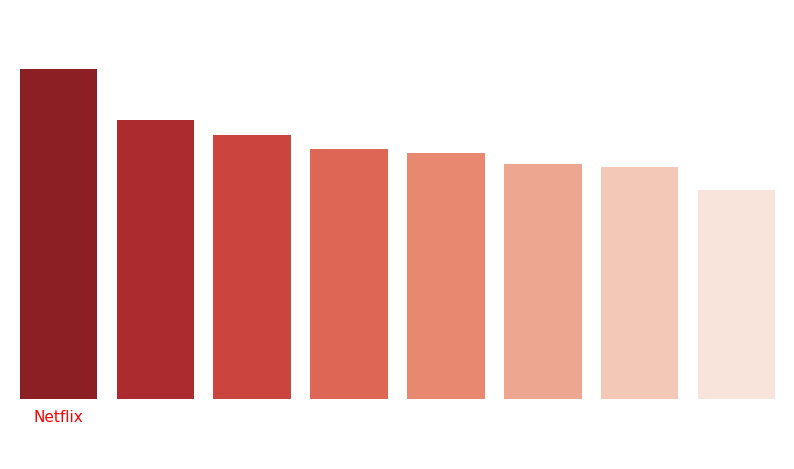

In [ ]:
# STREAM: AVERAGE RATING (MAX: 5)
stream_order = stream.sort_values(by=['Average Rating /5', 'Platform'], ascending=[False,True])
stream_order = stream_order.reset_index()
fig = plt.figure(figsize=(10,4.5))
stream_chart = sns.barplot(stream_order, x='Platform', y='Average Rating /5', palette='Reds_r')

for a in stream_chart.patches:
  if a.get_height() > 0:
    stream_chart.annotate(f'{a.get_height()}',
                        (a.get_x() + a.get_width() / 2, a.get_height()+0.05),
                        ha='center', va='bottom', fontsize=12, color='white', fontweight='semibold')
  a.set_zorder(3)

sns.despine()
# plt.legend(frameon=False)
stream_chart.spines['left'].set_visible(False)
stream_chart.spines['bottom'].set_visible(False)
plt.gca().tick_params(left=False, bottom=False, color='darkgray')
plt.xticks(fontsize=11, ticks=range(len(stream_order['Platform'])), labels=[label.replace(' ', '\n') for label in stream_order['Platform']])
plt.yticks([])
plt.gca().set_facecolor('none')
fig.patch.set_alpha(0)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3, zorder=0)

# Tô màu nhãn 'Netflix'
ax = plt.gca()
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == 'Netflix':
        tick_label.set_color('red')
    else:
        tick_label.set_color('white')

plt.title('Platform Average Rating (Max: 5)', fontsize=16, color='white', fontweight='semibold', loc='left', pad=20)
plt.xlabel('', fontsize=14, labelpad=20, fontweight='semibold')
plt.ylabel('')

In [ ]:
# COUNTRY_CODE: CLEAN DATA
country_code = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX/ISO Country Codes - Global/wikipedia-iso-country-codes.csv')
country_code.duplicated().sum()
country_code.isna().sum()
country_code.rename(columns={'English short name lower case': 'country', 'Alpha-2 code': 'country_code'}, inplace=True)
country_code.drop(['Alpha-3 code', 'Numeric code', 'ISO 3166-2'], axis=1, inplace=True)
country_code.drop_duplicates(inplace=True)  # bỏ hàng duplicate
country_code.dropna(inplace=True)